# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 2.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
125349,0.1758,0.2905,0.0464,0.0024,0.0024,0.0024,0.0024,0.0073,0.0195,0.0024,10,0,3,0
439175,0.9937,0.7202,0.1880,0.0024,0.0024,0.0098,0.1392,1.2207,0.0098,0.4810,10,10,20,20
217900,0.1587,0.1953,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,10,0,14,0
167533,0.8105,0.3540,0.6763,0.7617,0.0293,0.0024,0.0635,1.2939,2.1362,0.2808,10,10,8,8
269509,0.8765,0.9009,0.3394,0.4150,0.0952,0.0537,0.2466,1.9336,0.1978,0.8594,9,9,3,3


In [3]:
raw_data.shape

(472501, 14)

In [4]:
raw_data.columns

Index(['Emg1 ', 'Emg2', 'Emg3', 'Emg4', 'Emg5 ', 'Emg6', 'Emg7', 'Emg8',
       'Emg9', 'Emg10', 'repetition', 'rerepetition', 'stimulus',
       'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472501 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          472501 non-null  float64
 1   Emg2          472501 non-null  float64
 2   Emg3          472501 non-null  float64
 3   Emg4          472501 non-null  float64
 4   Emg5          472501 non-null  float64
 5   Emg6          472501 non-null  float64
 6   Emg7          472501 non-null  float64
 7   Emg8          472501 non-null  float64
 8   Emg9          472501 non-null  float64
 9   Emg10         472501 non-null  float64
 10  repetition    472501 non-null  int64  
 11  rerepetition  472501 non-null  int64  
 12  stimulus      472501 non-null  int64  
 13  restimulus    472501 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.5 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000,472501.000000
mean,0.449598,0.369994,0.165067,0.110990,0.056133,0.014915,0.042496,0.302602,0.260029,0.219605,3.124415,2.194270,5.539897,3.961033
std,0.549594,0.394968,0.285421,0.240335,0.265131,0.047967,0.110609,0.505100,0.485920,0.424508,3.479845,3.242834,6.570169,6.186865
min,0.002400,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.100100,0.114700,0.004900,0.002400,0.002400,0.002400,0.002400,0.014600,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000
50%,0.234400,0.263700,0.043900,0.002400,0.002400,0.002400,0.002400,0.095200,0.002400,0.063500,2.000000,0.000000,3.000000,0.000000
75%,0.590800,0.502900,0.192900,0.092800,0.009800,0.002400,0.024400,0.371100,0.324700,0.244100,6.000000,4.000000,10.000000,7.000000
max,4.665500,4.663100,3.886700,3.313000,4.663100,1.196300,1.621100,4.665500,4.663100,4.663100,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204101
8      15513
2      15511
7      15508
12     15504
4      15495
5      15490
6      15478
11     15473
9      15471
10     15448
3      15445
1      15427
17     10345
14     10345
13     10341
15     10313
16     10282
21      5194
19      5185
20      5178
18      5176
22      5151
23      5127
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

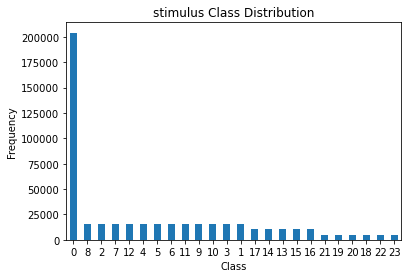

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
438699,1.3452,1.0132,0.3101,0.0684,0.0122,0.0366,0.2490,1.2817,0.0488,1.0327,0,0,0,0
241834,1.7480,0.2466,0.7642,0.3394,0.2856,0.0391,0.0684,0.7642,1.4941,0.1343,9,9,17,17
254037,1.1792,1.1011,0.4883,0.1294,0.1953,0.1196,0.2808,1.6333,0.4346,1.5405,1,1,2,2
258481,0.3394,0.5420,0.0903,0.0049,0.0024,0.0049,0.0049,0.2002,0.0024,0.3174,0,0,0,0
9721,1.1426,0.9961,0.9448,0.2295,0.0024,0.0024,0.0049,0.3296,1.5308,0.5542,2,2,2,2


In [12]:
raw_data.shape

(386613, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386613 entries, 0 to 472500
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          386613 non-null  float64
 1   Emg2          386613 non-null  float64
 2   Emg3          386613 non-null  float64
 3   Emg4          386613 non-null  float64
 4   Emg5          386613 non-null  float64
 5   Emg6          386613 non-null  float64
 6   Emg7          386613 non-null  float64
 7   Emg8          386613 non-null  float64
 8   Emg9          386613 non-null  float64
 9   Emg10         386613 non-null  float64
 10  repetition    386613 non-null  int64  
 11  rerepetition  386613 non-null  int64  
 12  stimulus      386613 non-null  int64  
 13  restimulus    386613 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 52.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# Dropping Feature 7

In [16]:
drop_list1 = ['Emg7']
X = X.drop(drop_list1,axis = 1 )       
X.head()

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg8,Emg9,Emg10
0,0.0269,0.1001,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
1,0.0269,0.0757,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
2,0.0317,0.0586,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
3,0.0293,0.0391,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024
4,0.0293,0.0269,0.0024,0.0024,0.0049,0.0024,0.0024,0.0024,0.0024


In [17]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 1000)
gb.fit(X_train, y_train)

MemoryError: Unable to allocate 56.6 MiB for an array with shape (309290, 24) and data type float64

In [ ]:
y_pred = gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred)* 100}")

In [ ]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

Reference : https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

# Evaluation

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))

In [ ]:
from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred,average='weighted'))

In [ ]:
from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred,average='weighted'))

In [ ]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred, average='weighted'))